# Heavylight example notebook

In [1]:
from heavylight import Model, Table
import seaborn as sns

Define the model as a class - note that it doesn't need to be defined in terms of `t` for time, but this is fairly standard

In [2]:
class Annuity(Model):
    def t(self, t):
        return t

    def expected_claim(self, t):
        return self.number_alive(t) * self.data["annuity_per_period"]

    def number_alive(self, t):
        if t == 0:
            return self.data["initial_policies"]
        else:
            return self.number_alive(t - 1) - self.deaths(t - 1)
    
    def deaths(self, t):
        return self.number_alive(t) * self.mortality_rate(t)

    def mortality_rate(self, t):
        return self.basis["q_x"][t]

Define the data for the model, as a python dictionary (can use any storage object)

In [3]:
policy_data = {
    "initial_policies": 10,
    "annuity_per_period": 55,
}

Creating a basis, pulling q_x from a csv file (made by `table_maker.ipynb`)

In [4]:
basis = {
    "q_x": Table.read_csv("sample_q_x_table.csv")
}

check that the table is working

In [5]:
basis["q_x"].df

x|int  value|float
0       0     0.066114
1       1     0.068653
2       2     0.071292
3       3     0.074036
4       4     0.076888
5       5     0.079853
6       6     0.082936
7       7     0.086140
8       8     0.089472
9       9     0.092935
10     10     0.096536
11     11     0.100279
12     12     0.104170
13     13     0.108216
14     14     0.112421
15     15     0.116793
16     16     0.121339
17     17     0.126064
18     18     0.130976
19     19     0.136083
20     20     0.141392
21     21     0.146911
22     22     0.152649
23     23     0.158614
24     24     0.164815
25     25     0.171262
26     26     0.177964
27     27     0.184931
28     28     0.192174
29     29     0.199704
30     30     0.207532
31     31     0.215670
32     32     0.224130
33     33     0.232925
34     34     0.242069
35     35     0.251574
36     36     0.261456
37     37     0.271730
38     38     0.282409
39     39     0.293512
40     40     0.305055
41     41     0.317054
42     42     0.329529
43     43     0.342497
44     44     0.355979
45     45     0.369995
46     46     0.384566
47     47     0.399713
48     48     0.415461
49     49     0.431832
50     50     0.448851

In [6]:
basis["q_x"][20]

0.141392

Create an instance of the model, passing in the data and basis.

In [8]:
model = Annuity(data = policy_data,
                basis = basis,
                proj_len = 40,
                )

We can look-up individual results of the model directly

In [9]:
model.expected_claim(5)

379.74840601212895

Pull all single parameter functions into a dataframe

In [10]:
model_cashflows = model.df
model_cashflows.head()

t    deaths  expected_claim  mortality_rate  number_alive
0  0  0.661143      550.000000        0.066114     10.000000
1  1  0.641139      513.637151        0.068653      9.338857
2  2  0.620078      478.374486        0.071292      8.697718
3  3  0.598033      444.270217        0.074036      8.077640
4  4  0.575091      411.378405        0.076888      7.479607

Plot the key output

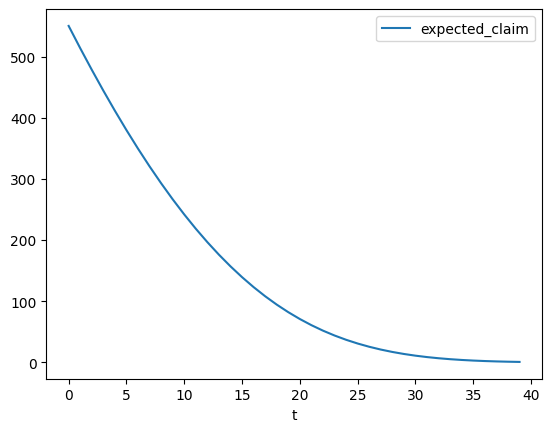

In [11]:
model_cashflows.plot(x="t", y="expected_claim");

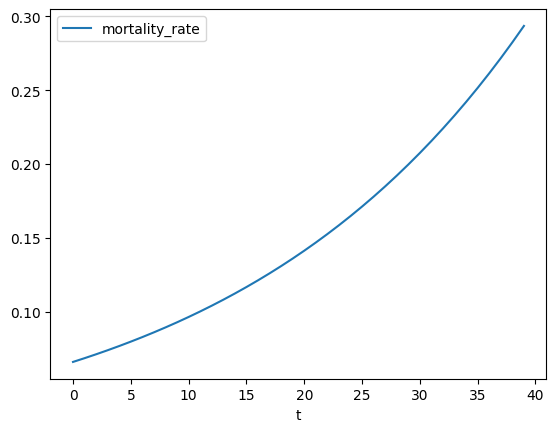

In [12]:
model_cashflows.plot(x="t", y="mortality_rate");

In [12]:
## Calculate the present value

In [13]:
def npv(cashflows, rate):
    """simple net present value function, using a flat discount rate"""
    return sum(cashflow / ((1 + rate) ** t) for t, cashflow in enumerate(cashflows, 1))

In [14]:
npv(model_cashflows["expected_claim"], 0.04)

4364.808437169175

Quick check that the NPV formula is sensible

In [15]:
npv(model_cashflows["expected_claim"], 0)

5963.772020370224

In [16]:
model_cashflows.expected_claim.sum()

5963.772020370226

We can also view the dataframe for an individual model variable

In [18]:
model.deaths.df.head()

t    deaths
0  0  0.661143
1  1  0.641139
2  2  0.620078
3  3  0.598033
4  4  0.575091

In [19]:
model.number_alive.df.tail()

t  number_alive
35  35      0.056652
36  36      0.042400
37  37      0.031314
38  38      0.022805
39  39      0.016365